
# Pass Network

This example shows how to plot passes between players in a set formation.
This is written by [@DymondFormation](https://twitter.com/DymondFormation)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from statsbombpy import sb
from mplsoccer import Pitch, FontManager, Sbopen

Set team and match info, and get event and tactics dataframes for the defined match_id



In [2]:
parser = Sbopen()
events, related, freeze, players = parser.event(15946)

#events, related, freeze, players = parser.event(15946)
TEAM = 'Barcelona'
OPPONENT = 'versus Alavés (A), 2018/19 La Liga'

Adding on the last tactics id and formation for the team for each event



In [3]:

events.loc[events.tactics_formation.notnull(), 'tactics_id'] = events.loc[
    events.tactics_formation.notnull(), 'id']

# Add on the last tactics id and formation for the opponent for each event
events[['tactics_id', 'tactics_formation']] = events.groupby('team_name')[[
    'tactics_id', 'tactics_formation']].ffill()
events.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,substitution_replacement_id,substitution_replacement_name,pass_cut_back,shot_one_on_one,foul_committed_advantage,foul_won_advantage,pass_deflected,pass_no_touch,pass_goal_assist,tactics_id
0,9f6e2ecf-6685-45df-a62e-c2db3090f6c1,1,1,00:00:00,0,0,1,0.000000,15946,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9f6e2ecf-6685-45df-a62e-c2db3090f6c1
1,0300039d-150d-41e4-b29a-76602ef002e6,2,1,00:00:00,0,0,1,0.000000,15946,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0300039d-150d-41e4-b29a-76602ef002e6
2,491e8901-7630-4cc8-b57b-937dddff2eaa,3,1,00:00:00,0,0,1,0.000000,15946,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9f6e2ecf-6685-45df-a62e-c2db3090f6c1
3,757b85ad-ddfe-44d5-b893-c23a9fb709d8,4,1,00:00:00,0,0,1,0.000000,15946,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0300039d-150d-41e4-b29a-76602ef002e6
4,549567bd-36de-4ac8-b8dc-6b5d3f1e4be8,5,1,00:00:00.575000,0,0,2,2.015669,15946,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0300039d-150d-41e4-b29a-76602ef002e6


In [4]:
players

,jersey_number,match_id,id,player_id,player_name,position_id,position_name,event_tactics_id
0,1,15946,9f6e2ecf-6685-45df-a62e-c2db3090f6c1,20055,Marc-André ter Stegen,1,Goalkeeper,1
1,2,15946,9f6e2ecf-6685-45df-a62e-c2db3090f6c1,6374,Nélson Cabral Semedo,2,Right Back,2
2,3,15946,9f6e2ecf-6685-45df-a62e-c2db3090f6c1,5213,Gerard Piqué Bernabéu,3,Right Center Back,3
3,23,15946,9f6e2ecf-6685-45df-a62e-c2db3090f6c1,5492,Samuel Yves Umtiti,5,Left Center Back,4
4,18,15946,9f6e2ecf-6685-45df-a62e-c2db3090f6c1,5211,Jordi Alba Ramos,6,Left Back,5
...,...,...,...,...,...,...,...,...
61,22,15946,92035681-1490-40fc-acf6-cb593a7172d2,8206,Arturo Erasmo Vidal Pardo,13,Right Center Midfield,7
62,8,15946,92035681-1490-40fc-acf6-cb593a7172d2,11392,Arthur Henrique Ramos de Oliveira Melo,15,Left Center Midfield,8
63,10,15946,92035681-1490-40fc-acf6-cb593a7172d2,5503,Lionel Andrés Messi Cuccittini,17,Right Wing,9
64,7,15946,92035681-1490-40fc-acf6-cb593a7172d2,3501,Philippe Coutinho Correia,21,Left Wing,10


Add the abbreviated player position to the players dataframe



In [5]:
formation_dict = {1: 'GK', 2: 'RB', 3: 'RCB', 4: 'CB', 5: 'LCB', 6: 'LB', 7: 'RWB',
                  8: 'LWB', 9: 'RDM', 10: 'CDM', 11: 'LDM', 12: 'RM', 13: 'RCM',
                  14: 'CM', 15: 'LCM', 16: 'LM', 17: 'RW', 18: 'RAM', 19: 'CAM',
                  20: 'LAM', 21: 'LW', 22: 'RCF', 23: 'ST', 24: 'LCF', 25: 'SS'}
players['position_abbreviation'] = players.position_id.map(formation_dict)
players.head()

,jersey_number,match_id,id,player_id,player_name,position_id,position_name,event_tactics_id,position_abbreviation
0,1,15946,9f6e2ecf-6685-45df-a62e-c2db3090f6c1,20055,Marc-André ter Stegen,1,Goalkeeper,1,GK
1,2,15946,9f6e2ecf-6685-45df-a62e-c2db3090f6c1,6374,Nélson Cabral Semedo,2,Right Back,2,RB
2,3,15946,9f6e2ecf-6685-45df-a62e-c2db3090f6c1,5213,Gerard Piqué Bernabéu,3,Right Center Back,3,RCB
3,23,15946,9f6e2ecf-6685-45df-a62e-c2db3090f6c1,5492,Samuel Yves Umtiti,5,Left Center Back,4,LCB
4,18,15946,9f6e2ecf-6685-45df-a62e-c2db3090f6c1,5211,Jordi Alba Ramos,6,Left Back,5,LB


Add on the subsitutions to the players dataframe, i.e. where players are subbed on
but the formation doesn't change



In [6]:
sub = events.loc[events.type_name == 'Substitution',
                 ['tactics_id', 'player_id', 'substitution_replacement_id',
                  'substitution_replacement_name']]
players_sub = players.merge(sub.rename({'tactics_id': 'id'}, axis='columns'),
                            on=['id', 'player_id'], how='inner', validate='1:1')
players_sub = (players_sub[['id', 'substitution_replacement_id', 'position_abbreviation']]
               .rename({'substitution_replacement_id': 'player_id'}, axis='columns'))
players = pd.concat([players, players_sub])
players.rename({'id': 'tactics_id'}, axis='columns', inplace=True)
players = players[['tactics_id', 'player_id', 'position_abbreviation']]


Add player position information to the events dataframe



In [47]:
players.head()

,tactics_id,player_id,position_abbreviation
0,9f6e2ecf-6685-45df-a62e-c2db3090f6c1,20055.0,GK
1,9f6e2ecf-6685-45df-a62e-c2db3090f6c1,6374.0,RB
2,9f6e2ecf-6685-45df-a62e-c2db3090f6c1,5213.0,RCB
3,9f6e2ecf-6685-45df-a62e-c2db3090f6c1,5492.0,LCB
4,9f6e2ecf-6685-45df-a62e-c2db3090f6c1,5211.0,LB


In [7]:
# add on the position the player was playing in the formation to the events dataframe
events = events.merge(players, on=['tactics_id', 'player_id'], how='left', validate='m:1')
# add on the position the receipient was playing in the formation to the events dataframe
events = events.merge(players.rename({'player_id': 'pass_recipient_id'},
                                     axis='columns'), on=['tactics_id', 'pass_recipient_id'],
                      how='left', validate='m:1', suffixes=['', '_receipt'])

In [48]:
events.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,substitution_replacement_id,substitution_replacement_name,pass_cut_back,shot_one_on_one,foul_committed_advantage,foul_won_advantage,pass_deflected,pass_no_touch,pass_goal_assist,tactics_id
0,9f6e2ecf-6685-45df-a62e-c2db3090f6c1,1,1,00:00:00,0,0,1,0.000000,15946,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9f6e2ecf-6685-45df-a62e-c2db3090f6c1
1,0300039d-150d-41e4-b29a-76602ef002e6,2,1,00:00:00,0,0,1,0.000000,15946,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0300039d-150d-41e4-b29a-76602ef002e6
2,491e8901-7630-4cc8-b57b-937dddff2eaa,3,1,00:00:00,0,0,1,0.000000,15946,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9f6e2ecf-6685-45df-a62e-c2db3090f6c1
3,757b85ad-ddfe-44d5-b893-c23a9fb709d8,4,1,00:00:00,0,0,1,0.000000,15946,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0300039d-150d-41e4-b29a-76602ef002e6
4,549567bd-36de-4ac8-b8dc-6b5d3f1e4be8,5,1,00:00:00.575000,0,0,2,2.015669,15946,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0300039d-150d-41e4-b29a-76602ef002e6


Show the formations used in the match



In [8]:
events.groupby('team_name').tactics_formation.unique()

team_name
Barcelona           [442, 433]
Deportivo Alavés    [451, 442]
Name: tactics_formation, dtype: object

Filter passes by chosen formation, then group all passes and receipts to
calculate avg x, avg y, count of events for each slot in the formation



In [9]:
FORMATION = '433'
pass_cols = ['id', 'position_abbreviation', 'position_abbreviation_receipt']
print(pass_cols)
passes_formation = events.loc[(events.team_name == TEAM) & (events.type_name == 'Pass') &
                              (events.tactics_formation == FORMATION) &
                              (events.position_abbreviation_receipt.notnull()), pass_cols].copy()
location_cols = ['position_abbreviation', 'x', 'y']
location_formation = events.loc[(events.team_name == TEAM) &
                                (events.type_name.isin(['Pass', 'Ball Receipt'])) &
                                (events.tactics_formation == FORMATION), location_cols].copy()

# average locations
average_locs_and_count = (location_formation.groupby('position_abbreviation')
                          .agg({'x': ['mean'], 'y': ['mean', 'count']}))
average_locs_and_count.columns = ['x', 'y', 'count']

# calculate the number of passes between each position (using min/ max so we get passes both ways)
passes_formation['pos_max'] = (passes_formation[['position_abbreviation',
                                                'position_abbreviation_receipt']]
                               .max(axis='columns'))
passes_formation['pos_min'] = (passes_formation[['position_abbreviation',
                                                'position_abbreviation_receipt']]
                               .min(axis='columns'))
passes_between = passes_formation.groupby(['pos_min', 'pos_max']).id.count().reset_index()
passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

print(passes_between)

# add on the location of each player so we have the start and end positions of the lines
passes_between = passes_between.merge(average_locs_and_count, left_on='pos_min', right_index=True)
passes_between = passes_between.merge(average_locs_and_count, left_on='pos_max', right_index=True,
                                      suffixes=['', '_end'])



['id', 'position_abbreviation', 'position_abbreviation_receipt']
   pos_min pos_max  pass_count
0      CDM      GK           3
1      CDM      LB          14
2      CDM     LCB           8
3      CDM     LCM          13
4      CDM      LW           8
5      CDM      RB          11
6      CDM     RCB          11
7      CDM     RCM          16
8      CDM      RW          16
9      CDM      ST           3
10      GK      LB           4
11      GK     LCB           4
12      GK     LCM           1
13      GK      RB           5
14      GK     RCB           5
15      GK     RCM           1
16      GK      RW           1
17      LB     LCB          18
18      LB     LCM          29
19      LB      LW          33
20      LB     RCB           3
21      LB     RCM           4
22      LB      RW           1
23      LB      ST           6
24     LCB     LCM           8
25     LCB      LW           3
26     LCB      RB           1
27     LCB     RCB          11
28     LCB     RCM           6
29   

Calculate the line width and marker sizes relative to the largest counts



In [36]:
MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000
passes_between['width'] = (passes_between.pass_count / passes_between.pass_count.max() *
                           MAX_LINE_WIDTH)
average_locs_and_count['marker_size'] = (average_locs_and_count['count']
                                         / average_locs_and_count['count'].max() * MAX_MARKER_SIZE)

Set color to make the lines more transparent when fewer passes are made



In [37]:
MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('white'))
color = np.tile(color, (len(passes_between), 1))
c_transparency = passes_between.pass_count / passes_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

Plotting



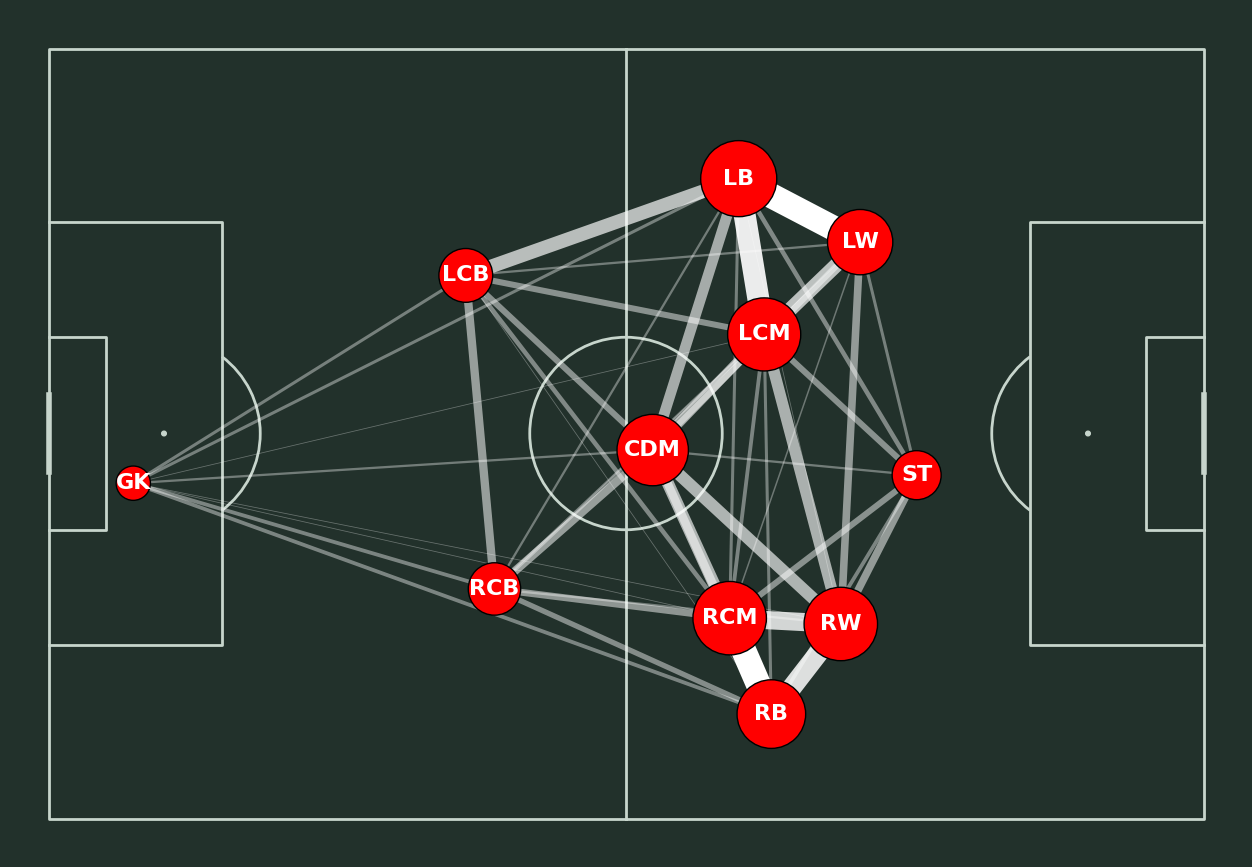

In [11]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor("#22312b")
pass_lines = pitch.lines(passes_between.x, passes_between.y,
                         passes_between.x_end, passes_between.y_end, lw=passes_between.width,
                         color=color, zorder=1, ax=ax)
pass_nodes = pitch.scatter(average_locs_and_count.x, average_locs_and_count.y,
                           s=average_locs_and_count.marker_size,
                           color='red', edgecolors='black', linewidth=1, alpha=1, ax=ax)
for index, row in average_locs_and_count.iterrows():
    pitch.annotate(row.name, xy=(row.x, row.y), c='white', va='center',
                   ha='center', size=16, weight='bold', ax=ax)

Plot the chart again with a title.
We will use mplsoccer's grid function to plot a pitch with a title and endnote axes.



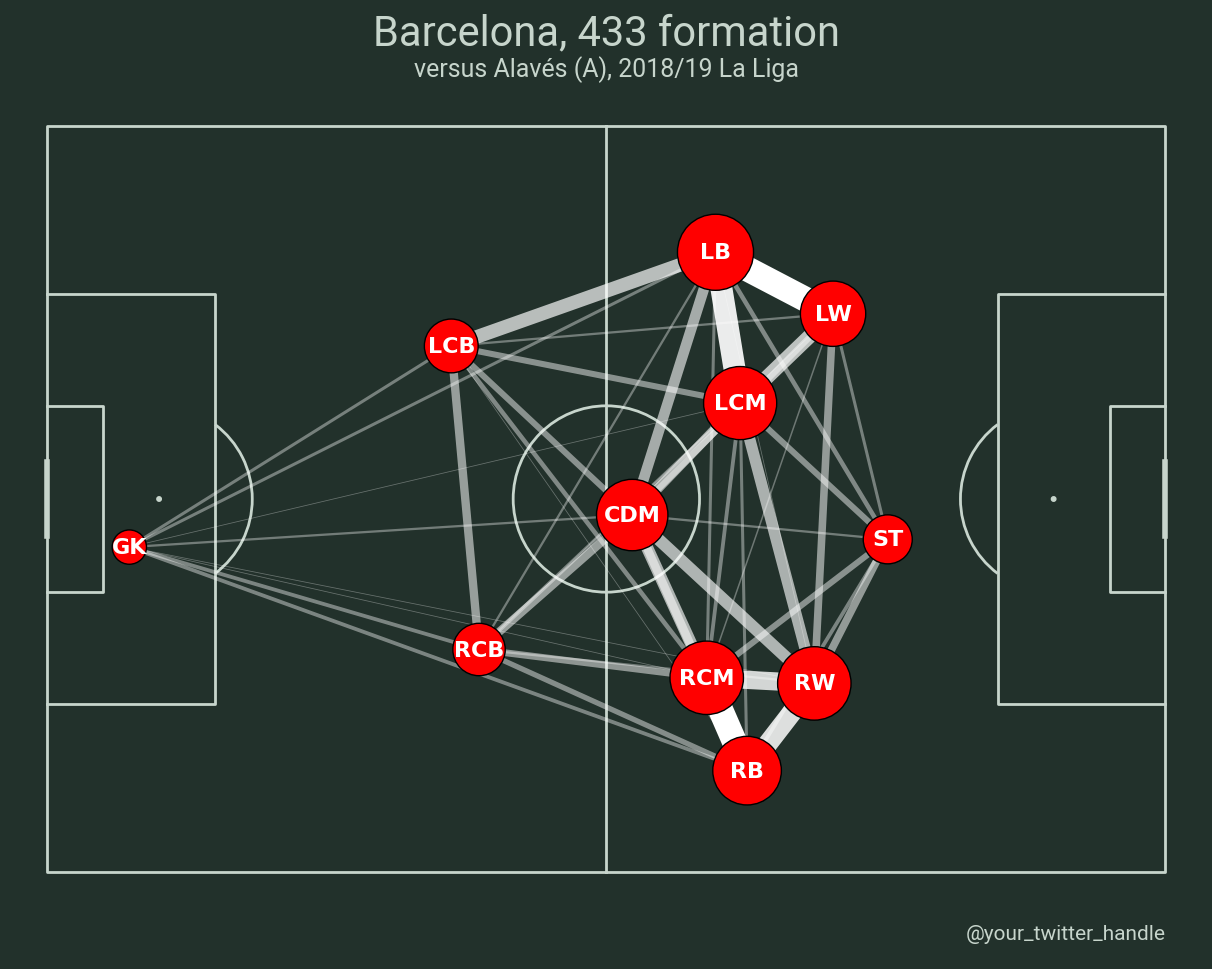

In [12]:
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_space=0, grid_height=0.82, endnote_height=0.05)
fig.set_facecolor("#22312b")
pass_lines = pitch.lines(passes_between.x, passes_between.y,
                         passes_between.x_end, passes_between.y_end, lw=passes_between.width,
                         color=color, zorder=1, ax=axs['pitch'])
pass_nodes = pitch.scatter(average_locs_and_count.x, average_locs_and_count.y,
                           s=average_locs_and_count.marker_size,
                           color='red', edgecolors='black', linewidth=1, alpha=1, ax=axs['pitch'])
for index, row in average_locs_and_count.iterrows():
    pitch.annotate(row.name, xy=(row.x, row.y), c='white', va='center',
                   ha='center', size=16, weight='bold', ax=axs['pitch'])

# Load a custom font.
URL = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Regular.ttf'
robotto_regular = FontManager(URL)

# endnote /title
axs['endnote'].text(1, 0.5, '@your_twitter_handle', color='#c7d5cc',
                    va='center', ha='right', fontsize=15,
                    fontproperties=robotto_regular.prop)
TITLE_TEXT = f'{TEAM}, {FORMATION} formation'
axs['title'].text(0.5, 0.7, TITLE_TEXT, color='#c7d5cc',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=30)
axs['title'].text(0.5, 0.25, OPPONENT, color='#c7d5cc',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=18)

# sphinx_gallery_thumbnail_path = 'gallery/pitch_plots/images/sphx_glr_plot_pass_network_002.png'

plt.show()  # If you are using a Jupyter notebook you do not need this line

## Alternative Passing Network Theme

The theme below is inspired by [@SergioMinuto90](https://twitter.com/SergioMinuto90) 
and his [friends of tracking tutorial on passing networks](https://github.com/Friends-of-Tracking-Data-FoTD/passing-networks-in-python).



Import the path_effects module for the text stroke



In [ ]:
import matplotlib.patheffects as path_effects

Get oswald font



In [ ]:
URL = "https://raw.githubusercontent.com/google/fonts/main/ofl/oswald/Oswald%5Bwght%5D.ttf"
oswald_regular = FontManager(URL)

Plot the chart with a title



In [ ]:
pitch = Pitch(
    pitch_type="statsbomb", pitch_color="white", line_color="black", linewidth=1,
)
fig, axs = pitch.grid(
    figheight=10,
    title_height=0.08,
    endnote_space=0,
    # Turn off the endnote/title axis. I usually do this after
    # I am happy with the chart layout and text placement
    axis=False,
    title_space=0,
    grid_height=0.82,
    endnote_height=0.01,
)
fig.set_facecolor("white")
pass_lines = pitch.lines(
    passes_between.x,
    passes_between.y,
    passes_between.x_end,
    passes_between.y_end,
    lw=passes_between.width,
    color="#BF616A",
    zorder=1,
    ax=axs["pitch"],
)
pass_nodes = pitch.scatter(
    average_locs_and_count.x,
    average_locs_and_count.y,
    s=average_locs_and_count.marker_size,
    color="#BF616A",
    edgecolors="black",
    linewidth=0.5,
    alpha=1,
    ax=axs["pitch"],
)
pass_nodes_internal = pitch.scatter(
    average_locs_and_count.x,
    average_locs_and_count.y,
    s=average_locs_and_count.marker_size / 2,
    color="white",
    edgecolors="black",
    linewidth=0.5,
    alpha=1,
    ax=axs["pitch"],
)
for index, row in average_locs_and_count.iterrows():
    text = pitch.annotate(
        row.name,
        xy=(row.x, row.y),
        c="black",
        va="center",
        ha="center",
        size=15,
        weight="bold",
        ax=axs["pitch"],
        fontproperties=oswald_regular.prop,
    )
    text.set_path_effects([path_effects.withStroke(linewidth=1, foreground="white")])

axs["endnote"].text(
    1,
    1,
    "@your_twitter_handle",
    color="black",
    va="center",
    ha="right",
    fontsize=15,
    fontproperties=oswald_regular.prop,
)
TITLE_TEXT = f"{TEAM}, {FORMATION} formation"
axs["title"].text(
    0.5,
    0.7,
    TITLE_TEXT,
    color="black",
    va="center",
    ha="center",
    fontproperties=oswald_regular.prop,
    fontsize=30,
)
axs["title"].text(
    0.5,
    0.15,
    OPPONENT,
    color="black",
    va="center",
    ha="center",
    fontproperties=oswald_regular.prop,
    fontsize=18,
)

plt.show()  # If you are using a Jupyter notebook you do not need this line